Books are open doors to the unimagined worlds which is unique to every person. It is more than just a hobby for many. There are many among us who prefer to spend more time with books than anything else.

Here we explore a big database of books. Books of different genres, from thousands of authors. In this challenge, participants are required to use the dataset to build a Machine Learning model to predict the price of books based on a given set of features.

# FEATURES:

*  Title: The title of the book

*  Author: The author(s) of the book.

*  Edition: The edition of the book eg (Paperback,– Import, 26 Apr 2018)

*  Reviews: The customer reviews about the book

*  Ratings: The customer ratings of the book

*  Synopsis: The synopsis of the book

*  Genre: The genre the book belongs to

*  BookCategory: The department the book is usually available at.

*  Price: The price of the book (Target variable)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\zZE94\\Desktop\\BoardInfinity\\Capstone ML Project\\Book Price Prediction'

In [3]:
traindf = pd.read_csv("TrainDataset.csv")
testdf = pd.read_csv("TestDataset.csv")

In [4]:
traindf.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,Geek Heresy,Kentaro Toyama,"Hardcover,– 26 May 2015",5.0 out of 5 stars,3 customer reviews,After a decade designing technologies meant to...,Economic Policy & Development,"Computing, Internet & Digital Media",799.0
1,Americanah,Chimamanda Ngozi Adichie,"Paperback,– 25 Jul 2014",4.1 out of 5 stars,49 customer reviews,"As teenagers in Lagos, Ifemelu and Obinze fall...",Romance (Books),Romance,223.0
2,AWS Certified Solutions Architect Associate Al...,Joyjeet Banerjee,"Paperback,– Audiobook, 10 Aug 2018",3.9 out of 5 stars,4 customer reviews,This effective study guide provides 100% cover...,Networks & System Administration (Books),"Computing, Internet & Digital Media",2677.0
3,Oxford Practice Grammar Intermediate: With Key...,John Eastwood,"Paperback,– 16 Jul 2012",4.9 out of 5 stars,14 customer reviews,Oxford Practice Grammar knows that students ne...,Language & Linguistics,"Language, Linguistics & Writing",675.0
4,Yoga for All: Discovering the True Essence of ...,Hansaji J. Yogendra,"Paperback,– 20 Aug 2018",5.0 out of 5 stars,11 customer reviews,"Written by one of India’s foremost yoga gurus,...","Mind, Body & Spirit (Books)","Language, Linguistics & Writing",204.0


In [5]:
testdf.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,"When I Stop Talking, You'll Know I'm Dead",Jerry Weintraub,"Paperback,– 23 Mar 2011",4.7 out of 5 stars,4 customer reviews,Here is the story of Jerry Weintraub: the self...,Cinema & Broadcast (Books),Humour
1,Alex Rider 11: Never Say Die,Anthony Horowitz,"Paperback,– Jul 2018",4.5 out of 5 stars,17 customer reviews,"Alex Rider is back in this brand new, explosiv...",Action & Adventure (Books),Action & Adventure
2,A Legacy of Spies,John le Carré,"Paperback,– 4 Oct 2017",4.1 out of 5 stars,29 customer reviews,"Peter Guillam, staunch colleague and disciple ...",Action & Adventure (Books),Politics
3,Dark Places,Gillian Flynn,"Paperback,– 10 Jun 2010",4.1 out of 5 stars,62 customer reviews,Your brother murdered your family. Your eviden...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery"
4,A Pelican Introduction: The Human Planet: How ...,Simon Lewis,"Mass Market Paperback,– Import, 24 Jul 2018",3.0 out of 5 stars,1 customer review,'Brilliantly written and genuinely one of the ...,Earth Sciences Textbooks,"Crime, Thriller & Mystery"


In [6]:
traindf.shape, testdf.shape

((4989, 9), (1248, 8))

In [7]:
traindf.info()
print()
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 9 columns):
Title           4989 non-null object
Author          4989 non-null object
Edition         4989 non-null object
Reviews         4989 non-null object
Ratings         4989 non-null object
Synopsis        4989 non-null object
Genre           4989 non-null object
BookCategory    4989 non-null object
Price           4989 non-null float64
dtypes: float64(1), object(8)
memory usage: 350.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 8 columns):
Title           1248 non-null object
Author          1248 non-null object
Edition         1248 non-null object
Reviews         1248 non-null object
Ratings         1248 non-null object
Synopsis        1248 non-null object
Genre           1248 non-null object
BookCategory    1248 non-null object
dtypes: object(8)
memory usage: 78.1+ KB


In [8]:
traindf.describe()

,Price
count,4989.000000
mean,560.629325
std,716.800911
min,28.000000
25%,248.000000
50%,372.000000
75%,599.000000
max,14100.000000


In [9]:
traindf.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [10]:
testdf.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
dtype: int64

<br>

<b>Inferences so far:</b>

1. The feature to be predicted here is `Price`.
2. All features except `Price` are object-type. So, a lot of data cleaning and encoding needs to be done to convert them into numeric form.
3. There are no null values in either the train or the test dataset.

<hr>

# Data Cleaning

<b>Steps performed:</b>

1. Dropped the `Title` and `Synopsis` column.
2. Cleaned and converted the values in `Reviews` column into numeric form.
3. Cleaned and converted the values in `Ratings` column into numeric form.
4. Divided `Edition` column into `Type` and `Date`
5. Cleaned the `Date` column and divided it into `Year` and `Month`.
6. Dropped the `Genre` column as `BookCategory` serves the same purpose.
7. Dropped objects from `Type` the count of which were very low as they won't serve any purpose in the prediction.
8. Converted the values in `Year` column into numeric form.

In [11]:
#Dropping `Title` and `Synopsis`

traindf.drop('Title',axis=1, inplace=True)
testdf.drop('Title',axis=1, inplace=True)
traindf.drop('Synopsis', axis=1, inplace=True)
testdf.drop('Synopsis', axis=1, inplace=True)

In [12]:
#Cleaning `Review` and `Ratings` columns

def cleanreview(x):
    x = x.split()
    x = float(x[0])
    return x
    
def cleanratings(x):
    x = x.replace(',','')
    x = x.split()
    x = int(x[0])
    return x

In [13]:
traindf['Reviews'] = traindf['Reviews'].apply(cleanreview)
testdf['Reviews'] = testdf['Reviews'].apply(cleanreview)

traindf['Ratings'] = traindf['Ratings'].apply(cleanratings)
testdf['Ratings'] = testdf['Ratings'].apply(cleanratings)

In [14]:
traindf.head()

,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price
0,Kentaro Toyama,"Hardcover,– 26 May 2015",5.0,3,Economic Policy & Development,"Computing, Internet & Digital Media",799.0
1,Chimamanda Ngozi Adichie,"Paperback,– 25 Jul 2014",4.1,49,Romance (Books),Romance,223.0
2,Joyjeet Banerjee,"Paperback,– Audiobook, 10 Aug 2018",3.9,4,Networks & System Administration (Books),"Computing, Internet & Digital Media",2677.0
3,John Eastwood,"Paperback,– 16 Jul 2012",4.9,14,Language & Linguistics,"Language, Linguistics & Writing",675.0
4,Hansaji J. Yogendra,"Paperback,– 20 Aug 2018",5.0,11,"Mind, Body & Spirit (Books)","Language, Linguistics & Writing",204.0


In [15]:
#Cleaning the `Edition` column

def cleanedition(x):
    lis = x.split(",–")
    date = lis[1].strip()
    return date

In [16]:
traindf['Date'] = traindf['Edition'].apply(cleanedition)
testdf['Date'] = testdf['Edition'].apply(cleanedition)

In [17]:
def cleanedition(x):
    lis = x.split(",–")
    typez = lis[0].strip()
    return typez

In [18]:
traindf['Type'] = traindf['Edition'].apply(cleanedition)
testdf['Type'] = testdf['Edition'].apply(cleanedition)

In [19]:
traindf.drop('Edition',axis=1, inplace=True)
testdf.drop('Edition',axis=1, inplace=True)

In [20]:
traindf.head()

,Author,Reviews,Ratings,Genre,BookCategory,Price,Date,Type
0,Kentaro Toyama,5.0,3,Economic Policy & Development,"Computing, Internet & Digital Media",799.0,26 May 2015,Hardcover
1,Chimamanda Ngozi Adichie,4.1,49,Romance (Books),Romance,223.0,25 Jul 2014,Paperback
2,Joyjeet Banerjee,3.9,4,Networks & System Administration (Books),"Computing, Internet & Digital Media",2677.0,"Audiobook, 10 Aug 2018",Paperback
3,John Eastwood,4.9,14,Language & Linguistics,"Language, Linguistics & Writing",675.0,16 Jul 2012,Paperback
4,Hansaji J. Yogendra,5.0,11,"Mind, Body & Spirit (Books)","Language, Linguistics & Writing",204.0,20 Aug 2018,Paperback


In [21]:
#Cleaning the `Date` column

def cleandate(x):
    try:
        x = x[-11::1]
    except:
        x = x[-10::1]
    return x

In [22]:
traindf['Date'] = traindf['Date'].apply(cleandate)
testdf['Date'] = testdf['Date'].apply(cleandate)

In [23]:
def cleandate2(x):
    x = x.split()
    if len(x) == 1:
        return x[0]
    elif len(x) == 3:
        return x[2]

In [24]:
traindf['Year'] = traindf['Date'].apply(cleandate2)
testdf['Year'] = testdf['Date'].apply(cleandate2)

In [25]:
def cleandate3(x):
    x = x.split()
    if len(x) == 3:
        return x[1]

In [26]:
traindf['Month'] = traindf['Date'].apply(cleandate3)
testdf['Month'] = testdf['Date'].apply(cleandate3)

In [27]:
traindf.drop('Date',axis=1,inplace=True);
testdf.drop('Date',axis=1, inplace=True)

In [28]:
traindf.head()

,Author,Reviews,Ratings,Genre,BookCategory,Price,Type,Year,Month
0,Kentaro Toyama,5.0,3,Economic Policy & Development,"Computing, Internet & Digital Media",799.0,Hardcover,2015,May
1,Chimamanda Ngozi Adichie,4.1,49,Romance (Books),Romance,223.0,Paperback,2014,Jul
2,Joyjeet Banerjee,3.9,4,Networks & System Administration (Books),"Computing, Internet & Digital Media",2677.0,Paperback,2018,Aug
3,John Eastwood,4.9,14,Language & Linguistics,"Language, Linguistics & Writing",675.0,Paperback,2012,Jul
4,Hansaji J. Yogendra,5.0,11,"Mind, Body & Spirit (Books)","Language, Linguistics & Writing",204.0,Paperback,2018,Aug


In [29]:
#Dropping `Genre` from both train and test

traindf.drop('Genre', axis=1, inplace=True)
testdf.drop('Genre', axis=1, inplace=True)

In [30]:
#Dropping rows with missing values created in the process of dividing columns

#traindf.dropna(how='any', axis=0, inplace=True)
#testdf.dropna(how='any', axis=0, inplace=True)

In [31]:
#Dropping extremely low value count objects from `Type`

#index = traindf.Type.value_counts()[(traindf.Type.value_counts() < 16)].index
#traindf.drop(traindf[(traindf[traindf.isin(index)].Type).notnull()].index, inplace=True);

#index2 = testdf.Type.value_counts()[(testdf.Type.value_counts() < 10)].index
#testdf.drop(testdf[(testdf[testdf.isin(index2)].Type).notnull()].index, inplace=True)

In [32]:
#Dropping miscellaneous rows from `Year` that don't fit numeric type

#traindf.drop(traindf[traindf.Year == 'set'].index, inplace=True);
#testdf.drop(testdf[testdf.Year == 'set'].index, inplace=True);

In [33]:
#Converting values in `Year` column to int

#traindf['Year'] = traindf['Year'].astype(int);
#testdf['Year'] = testdf['Year'].astype(int);

In [34]:
traindf.head()

,Author,Reviews,Ratings,BookCategory,Price,Type,Year,Month
0,Kentaro Toyama,5.0,3,"Computing, Internet & Digital Media",799.0,Hardcover,2015,May
1,Chimamanda Ngozi Adichie,4.1,49,Romance,223.0,Paperback,2014,Jul
2,Joyjeet Banerjee,3.9,4,"Computing, Internet & Digital Media",2677.0,Paperback,2018,Aug
3,John Eastwood,4.9,14,"Language, Linguistics & Writing",675.0,Paperback,2012,Jul
4,Hansaji J. Yogendra,5.0,11,"Language, Linguistics & Writing",204.0,Paperback,2018,Aug


<hr>

# Exploratory Data Analysis

TypeError: can only concatenate str (not "NoneType") to str

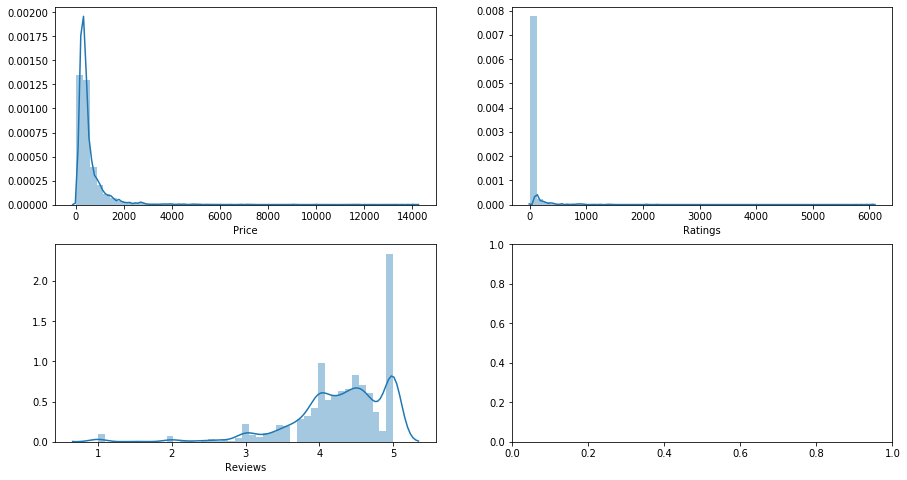

In [35]:
fig,ax = plt.subplots(2,2, figsize=(15,8))
sns.distplot(traindf.Price, ax=ax[0,0])
sns.distplot(traindf.Ratings, ax=ax[0,1])
sns.distplot(traindf.Reviews, ax=ax[1,0])
sns.distplot(traindf.Year, ax=ax[1,1]);

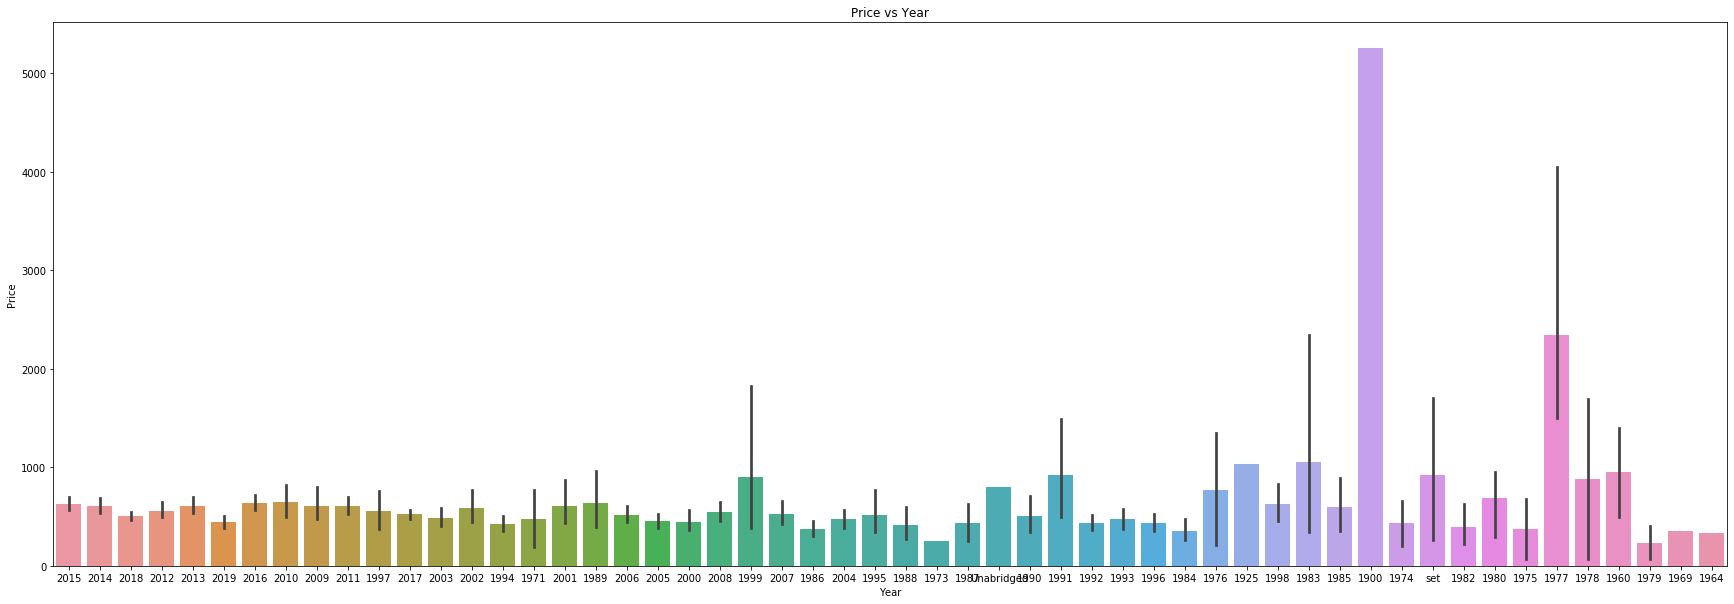

In [36]:
plt.figure(figsize=(30,10))
plt.title("Price vs Year")
sns.barplot(y=traindf.Price, x=traindf.Year);

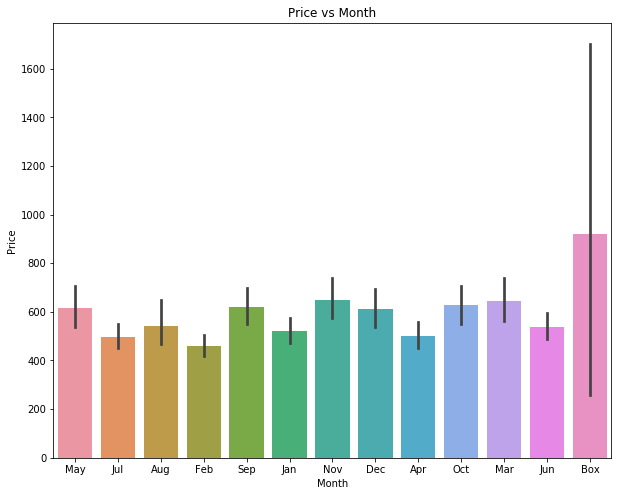

In [37]:
plt.figure(figsize=(10,8))
plt.title("Price vs Month")
sns.barplot(y=traindf.Price, x=traindf.Month);

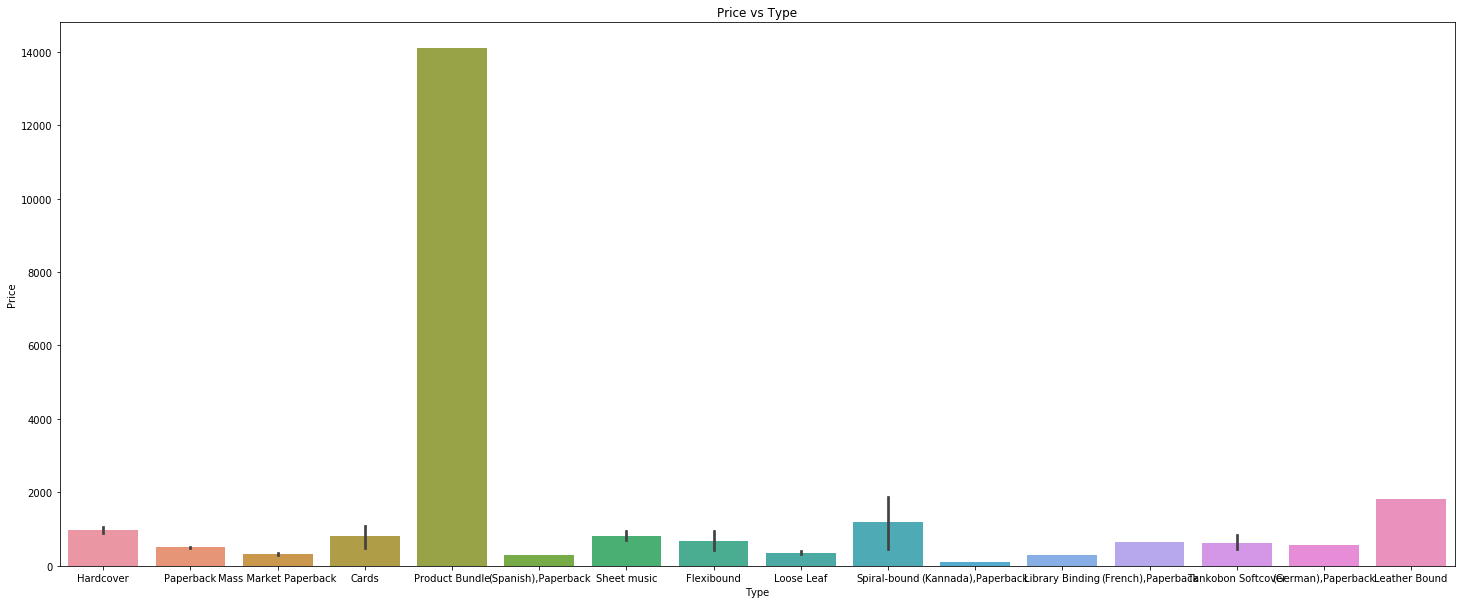

In [38]:
plt.figure(figsize=(25,10))
plt.title("Price vs Type")
sns.barplot(y=traindf.Price, x=traindf.Type);

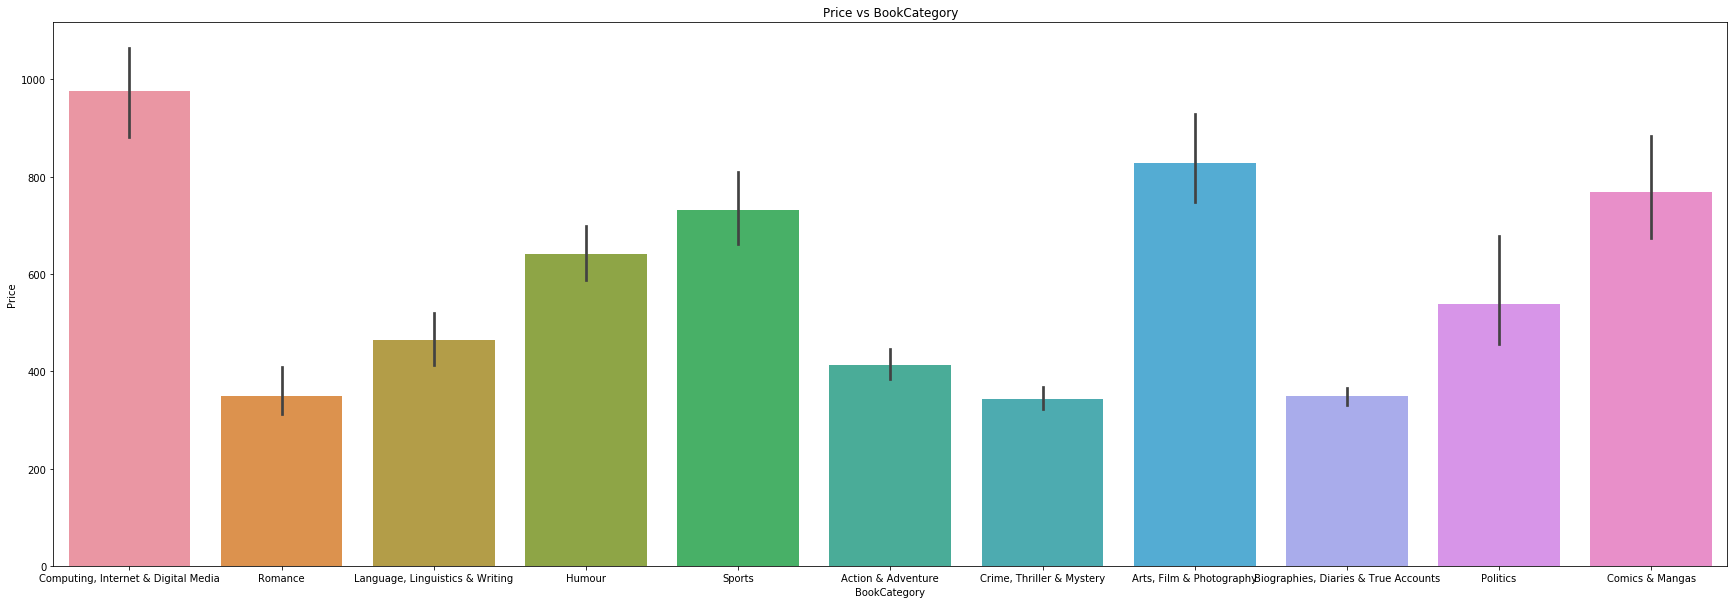

In [39]:
plt.figure(figsize=(30,10))
plt.title("Price vs BookCategory")
sns.barplot(y=traindf.Price, x=traindf.BookCategory);

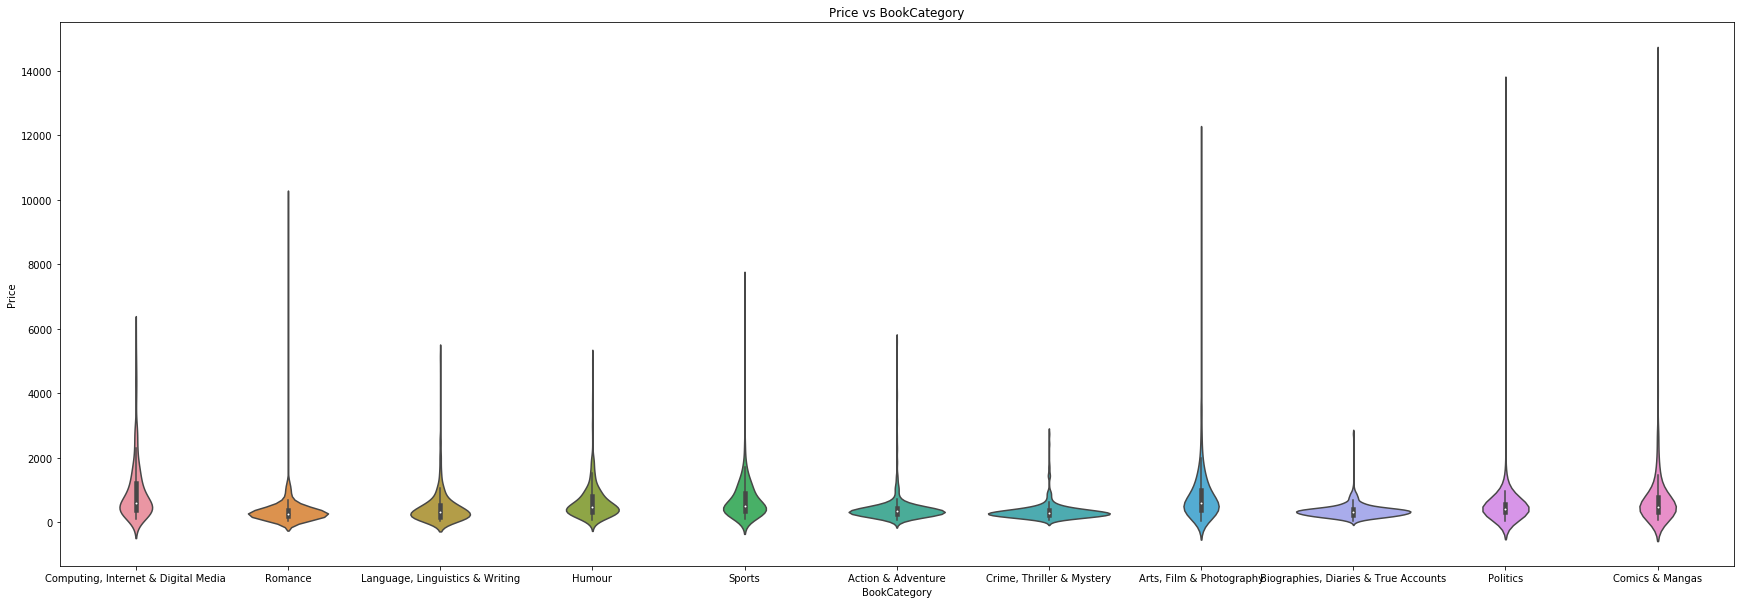

In [40]:
plt.figure(figsize=(30,10))
plt.title("Price vs BookCategory")
sns.violinplot(y=traindf.Price, x=traindf.BookCategory);

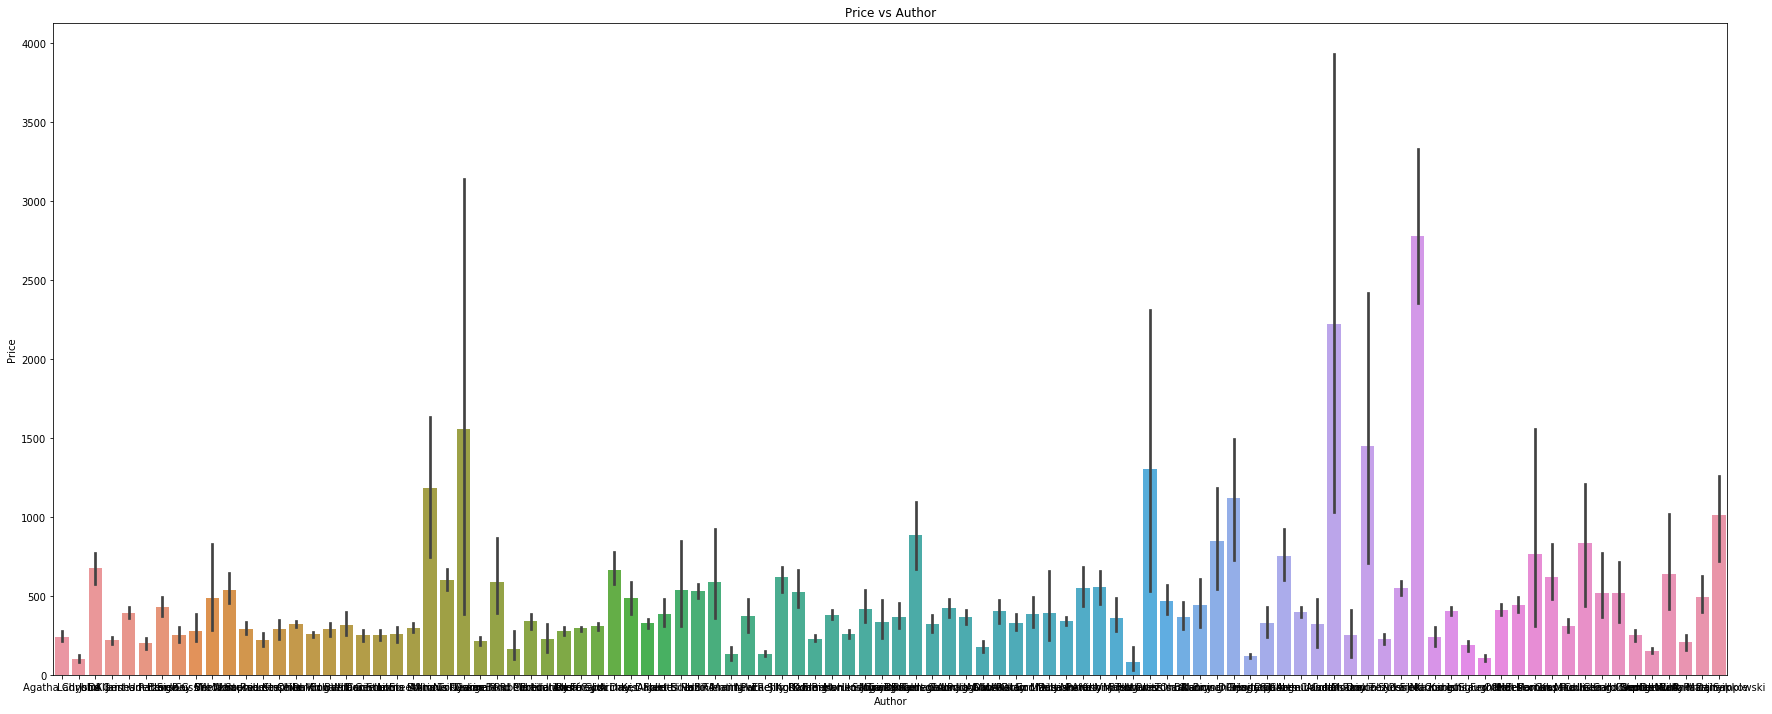

In [41]:
order = traindf['Author'].value_counts().head(100).index

plt.figure(figsize=(30,12))
plt.title("Price vs Author")
sns.barplot(x=traindf.Author, y=traindf.Price, order=order);

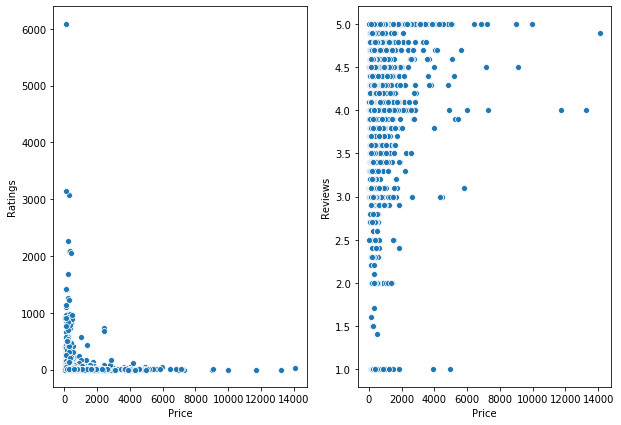

In [42]:
fig, ax =plt.subplots(1,2, figsize=(10,7))
sns.scatterplot(traindf.Price, traindf.Ratings, ax=ax[0]);
sns.scatterplot(traindf.Price, traindf.Reviews,ax=ax[1]);

In [43]:
traindf.corr()

,Reviews,Ratings,Price
Reviews,1.000000,0.003408,0.100473
Ratings,0.003408,1.000000,-0.073585
Price,0.100473,-0.073585,1.000000


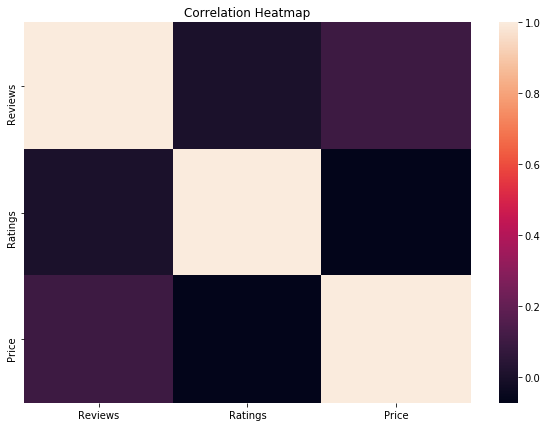

In [44]:
plt.figure(figsize=(10,7))
plt.title("Correlation Heatmap")
sns.heatmap(traindf.corr());

<br>

<b>Inferences so far:</b>

1. The `Price` seems to be high in some specific years such as 1900 and 1977 but as visible from the distribution plot, the records for those years are extremely low and hence, do not represent a good average but are just outliers. Therefore, `Year` seems to have little to no effect on the `Price`.
2. `Month` does not seem to have an effect on `Price` either. There are highs and lows in separate months but there is no discernible prominent pattern.
3. There is a very clear difference in `Price` amongst different `Type`. The `Price` is noticeably higher in `Hardcover`, followed by `Paperback`, then followed by `Mass Market Paperback`.
4. The `BookCategory` column tells us that the books in `Computing, Internet & Digital Media` are priced higher compared to other categories, whereas books falling in `Romance` and `Crime, Thriller & Mystery` are the lowest priced. This feature seems to be an important predictor. However, it should be noted that the categories with the lowest average prices also have the highest count.
5. The `Author` name seems to have an effect on the price of the book. This can turn out to be a useful feature to predict the `Price.
6. The correlation between `Price` and `Ratings` is very weak, almost negligible. But the correlation between `Price` and `Reviews` seems to be slightly stronger.

<hr>

# Encoding

<b>Steps performed:</b>

1. Created dummies for the `Type` feature.
2. Created dummies for the `BookCategory` feature.
3. Added the `Reviews` feature to the new dataframe.

In [45]:
traindf.head()

,Author,Reviews,Ratings,BookCategory,Price,Type,Year,Month
0,Kentaro Toyama,5.0,3,"Computing, Internet & Digital Media",799.0,Hardcover,2015,May
1,Chimamanda Ngozi Adichie,4.1,49,Romance,223.0,Paperback,2014,Jul
2,Joyjeet Banerjee,3.9,4,"Computing, Internet & Digital Media",2677.0,Paperback,2018,Aug
3,John Eastwood,4.9,14,"Language, Linguistics & Writing",675.0,Paperback,2012,Jul
4,Hansaji J. Yogendra,5.0,11,"Language, Linguistics & Writing",204.0,Paperback,2018,Aug


In [46]:
#One-hot-encoding the `Type`, and `BookCategory` features

train_newdf = pd.get_dummies(traindf[['Type','BookCategory']])
test_newdf = pd.get_dummies(testdf[['Type','BookCategory']])

In [47]:
train_newdf['Reviews'] = traindf['Reviews']
test_newdf['Reviews'] = testdf['Reviews']

In [48]:
train_newdf.head()

,"Type_(French),Paperback","Type_(German),Paperback","Type_(Kannada),Paperback","Type_(Spanish),Paperback",Type_Cards,Type_Flexibound,Type_Hardcover,Type_Leather Bound,Type_Library Binding,Type_Loose Leaf,...,"BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Reviews
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4.1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3.9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4.9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5.0


In [49]:
test_newdf.head()

,Type_Board book,Type_Cards,Type_Flexibound,Type_Hardcover,Type_Mass Market Paperback,Type_Paperback,Type_Perfect Paperback,Type_Plastic Comb,Type_Sheet music,Type_Spiral-bound,...,"BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Reviews
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4.7
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.5
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4.1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4.1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3.0


In [74]:
train_newdf.columns

Index(['Type_Cards', 'Type_Flexibound', 'Type_Hardcover',
       'Type_Mass Market Paperback', 'Type_Paperback', 'Type_Sheet music',
       'Type_Spiral-bound', 'Type_Tankobon Softcover',
       'BookCategory_Action & Adventure',
       'BookCategory_Arts, Film & Photography',
       'BookCategory_Biographies, Diaries & True Accounts',
       'BookCategory_Comics & Mangas',
       'BookCategory_Computing, Internet & Digital Media',
       'BookCategory_Crime, Thriller & Mystery', 'BookCategory_Humour',
       'BookCategory_Language, Linguistics & Writing', 'BookCategory_Politics',
       'BookCategory_Romance', 'BookCategory_Sports', 'Reviews'],
      dtype='object')

In [75]:
test_newdf.columns

Index(['Type_Cards', 'Type_Flexibound', 'Type_Hardcover',
       'Type_Mass Market Paperback', 'Type_Paperback', 'Type_Sheet music',
       'Type_Spiral-bound', 'BookCategory_Action & Adventure',
       'BookCategory_Arts, Film & Photography',
       'BookCategory_Biographies, Diaries & True Accounts',
       'BookCategory_Comics & Mangas',
       'BookCategory_Computing, Internet & Digital Media',
       'BookCategory_Crime, Thriller & Mystery', 'BookCategory_Humour',
       'BookCategory_Language, Linguistics & Writing', 'BookCategory_Politics',
       'BookCategory_Romance', 'BookCategory_Sports', 'Reviews'],
      dtype='object')

In [63]:
train_newdf.drop(['Type_Product Bundle','Type_(French),Paperback', 'Type_(German),Paperback','Type_(Kannada),Paperback', 'Type_(Spanish),Paperback','Type_Leather Bound','Type_Library Binding', 'Type_Loose Leaf'], axis=1, inplace=True)

In [76]:
train_newdf.drop('Type_Tankobon Softcover', axis=1, inplace=True)

In [64]:
test_newdf.drop(['Type_Plastic Comb','Type_Perfect Paperback','Type_Board book'], axis=1, inplace=True)

In [77]:
train_newdf.shape

(4989, 19)

In [78]:
test_newdf.shape

(1248, 19)

<hr>

# Model building

In [79]:
X_train = train_newdf
y_train = traindf['Price']
X_test = test_newdf

In [80]:
reg = LinearRegression(n_jobs=-1)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [81]:
reg.coef_, reg.intercept_

(array([-8.62932403e+02, -1.02365292e+03, -7.49568261e+02, -1.25108950e+03,
        -1.19522388e+03, -1.11682290e+03, -6.38188524e+02,  6.04738771e+15,
         6.04738771e+15,  6.04738771e+15,  6.04738771e+15,  6.04738771e+15,
         6.04738771e+15,  6.04738771e+15,  6.04738771e+15,  6.04738771e+15,
         6.04738771e+15,  6.04738771e+15,  7.68608465e+01]),
 -6047387708026689.0)

In [82]:
y_train_pred = reg.predict(X_train)

In [83]:
r2_score(y_train,y_train_pred)

0.13833795836710394

In [84]:
mean_squared_error(y_train, y_train_pred)

442636.27268226095

In [85]:
y_test_pred = reg.predict(X_test)

### Conclusion:

1. The r2_score is 0.14 which indicates that `BookCategory`, `Type` and `Reviews` of the book are not very good indicators of its `Price`.
2. Perhaps the `Price` can be better predicted if there was publisher name involved in the data, or by using the `Author` column in a different model.

<br>

#### Saving to CSV format

In [86]:
(pd.DataFrame(y_test_pred)).to_csv("bookpriceprediction.csv", index=False)